In [214]:
import numpy as np
from scipy.optimize import minimize



In [215]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.07766632444992065, 1.0001993268474256, 1.0333128725781264, 0.9996824064336052, 0.9020178871027813, 0.9994433541266963, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [216]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)


In [217]:
cos = np.cos
sin = np.sin

In [218]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

In [219]:
def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

In [220]:
def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [221]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand
    

In [222]:
def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand
    

In [223]:
def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand
    

In [224]:


def f_classical(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_classical_prime(a, b, c, d, t):
    return  3*a*t**2 + 2*b*t + c

def f_classical_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


n_grid = 10
range_min = 0.2
range_max = 0.4
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

print(t_data)


print('=======')
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = params


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f_classical(a1, b1, c1, d1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f_classical(a2, b2, c2, d2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f_classical(a3, b3, c3, d3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f_classical(a1, b1, c1, d1, t_data[i])
        u2[i + 1] = f_classical(a2, b2, c2, d2, t_data[i])
        u3[i + 1] = f_classical(a3, b3, c3, d3, t_data[i])


    u1[n_grid + 1]=f_classical(a1, b1, c1, d1, range_max + dt)  
    u2[n_grid + 1]=f_classical(a2, b2, c2, d2, range_max + dt)  
    u3[n_grid + 1]=f_classical(a3, b3, c3, d3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss



initial_params = [1, 2, 3,4,1,2,3,4,1,2,3,4]
# initial_params_f2 = [1, 2, 3,4]
# initial_params_f3 = [1, 2, 3,4]

# initial_params = [4, 4, 4,4]
# initial_params = [10, 20, 8,70]
# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = result.x


print("Optimized a:", a1)
print("Optimized b:", b1)
print("Optimized c:", c1)
print("Optimized d:", d1)

[0.2        0.22222222 0.24444444 0.26666667 0.28888889 0.31111111
 0.33333333 0.35555556 0.37777778 0.4       ]
Current loss: 80584410538775.39
Current loss: 78246654184000.67
Current loss: 76135368228362.97
Current loss: 72790979590760.22
Current loss: 72511130497561.55
Current loss: 72493723547496.42
Current loss: 72489352767777.95
Current loss: 72451603057824.94
Current loss: 72380181127350.45
Current loss: 72373138170754.34
Current loss: 72317811618065.98
Current loss: 72220937669144.44
Current loss: 57528949000949.945
Current loss: 34325717619698.87
Current loss: 4227682411970.816
Current loss: 1613285091790.7388
Current loss: 1004783649667.5431
Current loss: 890725269586.1056
Current loss: 846513696673.4104
Current loss: 771843170979.3885
Current loss: 664642589883.9347
Current loss: 562042600545.244
Current loss: 412674889906.97644
Current loss: 211795183100.54898
Current loss: 68958623229.95023
Current loss: 4564545456.853963
Current loss: 407815940.7295553
Current loss: 23951

In [225]:
# del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
# omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

# del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
# omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

# del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
# omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]


In [226]:
del1_target_values=[0.07766632444992065, 0.07933054667582021, 0.08098347914070886, 0.08262515088780213, 0.08425559208109452, 0.0858748340053596, 0.08748290906614999, 0.08907985078979733, 0.09066569401385427, 0.09224047435199545]
omega1_target_values=[1.0001993268474256, 1.0001979775931533, 1.0001966317116773, 1.0001952893259891, 1.000193950573148, 1.0001926156042804, 1.0001912845845797, 1.0001899576933067, 1.000188635079239, 1.0001873167825794]

del2_target_values=[1.0333128725781264, 1.030653645698607, 1.0279974687063367, 1.025344597533783, 1.022695283458243, 1.0200497731018445, 1.0174083084315448, 1.0147711267591317, 1.0121384603230947, 1.0095105373100135]
omega2_target_values=[0.9996824064336052, 0.9996827549035263, 0.9996831342594837, 0.9996835439794584, 0.9996839835042528, 0.9996844522374916, 0.9996849495456209, 0.9996854747579094, 0.999686027303509, 0.9996866067497724]

del3_target_values=[0.9020178871027813, 0.8973802997086154, 0.8927939374297158, 0.8882583649363642, 0.8837731450610682, 0.8793378387985601, 0.8749520053057974, 0.8706152019019627, 0.8663269827245573, 0.8620869019990374]
omega3_target_values=[0.9994433541266963, 0.9994494942752077, 0.9994555827438062, 0.9994616193703945, 0.9994676039105025, 0.9994735360372881, 0.9994794153415366, 0.9994852413316613, 0.9994910136243408, 0.9994967326574486]


[1.00027538 1.00027324 1.00027109 1.00026894 1.0002668  1.00026465
 1.00026251 1.00026036 1.00025822 1.00025607]


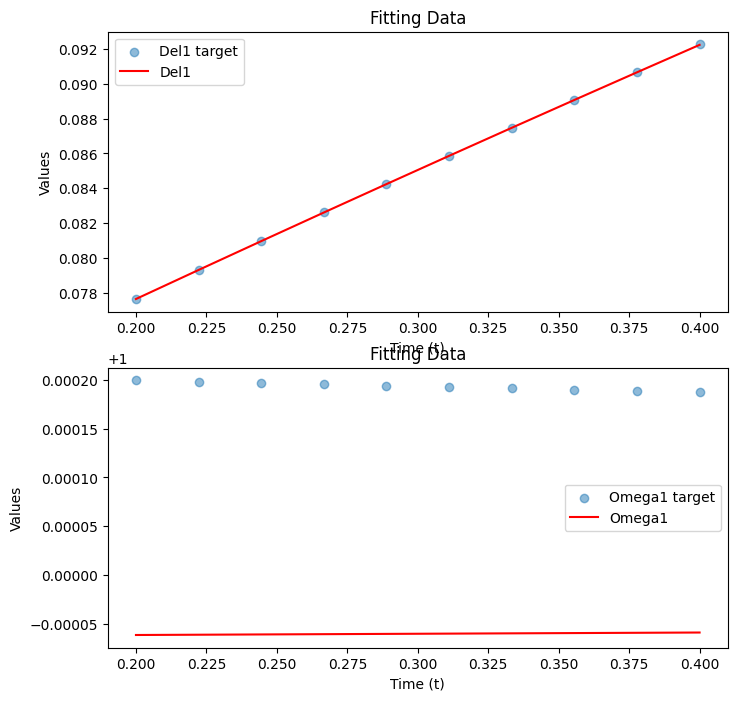

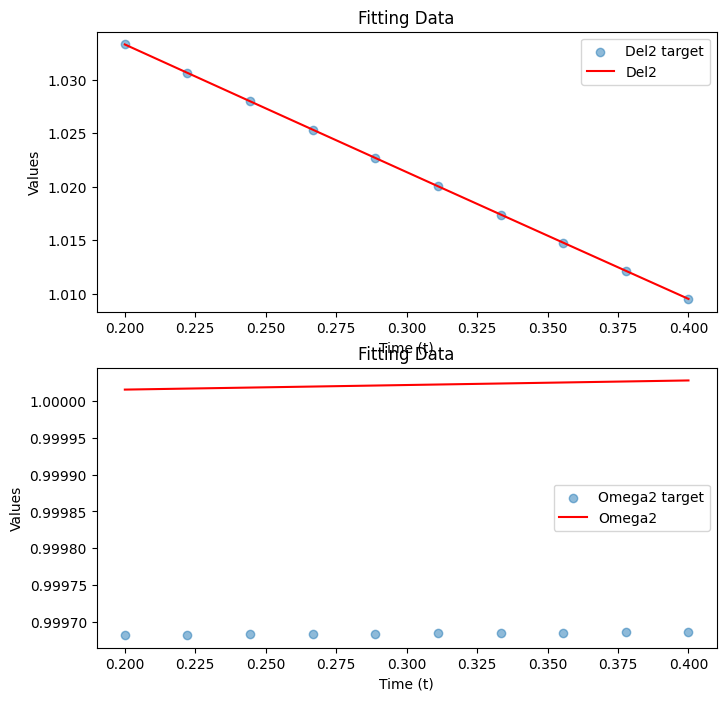

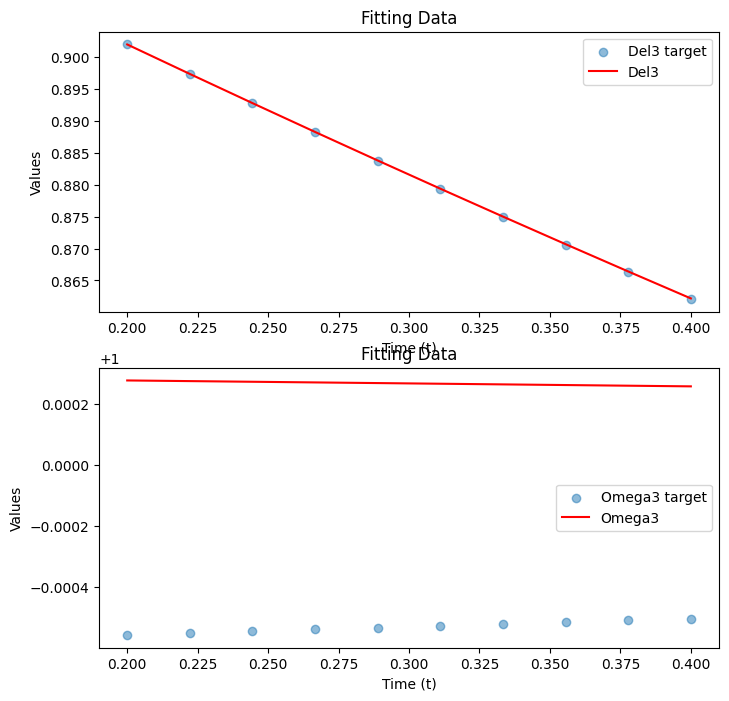

In [227]:
import matplotlib.pyplot as plt


# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
fitted_values1 = f_classical(a1, b1, c1, d1,t_data)
plt.plot(t_data, fitted_values1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
fitted_values2 = (1/Ws)*f_classical_prime(a1,b1,c1,d1,t_data)+1

plt.plot(t_data, fitted_values2, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
fitted_values3 = f_classical(a2, b2, c2, d2,t_data)
plt.plot(t_data, fitted_values3, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
fitted_values4 = (1/Ws)*f_classical_prime(a2,b2,c2,d2,t_data)+1
plt.plot(t_data, fitted_values4, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
fitted_values5 = f_classical(a3, b3, c3, d3,t_data)
plt.plot(t_data, fitted_values5, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
fitted_values6 = (1/Ws)*f_classical_prime(a3,b3,c3,d3,t_data)+1
plt.plot(t_data, fitted_values6, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(fitted_values6)